# Bootstraped Event Mixing - V03

- https://indico.cern.ch/event/890471/contributions/3758301/attachments/1993479/3324958/CMS_AN_2019_034-v1.pdf

- https://indico.cern.ch/event/174828/contributions/1438601/attachments/223705/313163/slides.pdf#search=event%20mixing%20AND%20cerntaxonomy%3A%22Indico%2FExperiments%2FCMS%20meetings%22

- https://indico.cern.ch/event/890471/contributions/3758301/attachments/1993479/3325048/Yll-_Status_BPH_Feb_25.pdf

- https://www-sciencedirect-com.ezproxy.cern.ch/science/article/pii/0167508784902758?via%3Dihub

- https://www-sciencedirect-com.ezproxy.cern.ch/science/article/pii/S0370269311009646?via%3Dihub

- https://arxiv.org/pdf/1503.03836.pdf

- http://cds.cern.ch/record/1645841/files/TS2014_004_2.pdf

### Changelog:

- **Naive Event Mixing:** Vanilla Event Mixing. Good enought for modeling only on the $m_{\mu\mu\gamma}$ invariant mass.

- **Bootstraped Event Mixing - V01:** Based on the naive version, this one implements:
 - A model of the dimuon invariant mass taken from a non photon correlated sample.
 - A model of the muon $E_{T}$ taken from a dimuon correlated sample.
 - After the mixing, the dimuon invariant mass and the $E_{T}$ are sampled from the models.

- **Bootstraped Event Mixing - V02:** Based on the V01, this one implements:
 - A model of the $|\Delta (\mu\mu, \gamma)|$ is implemented from a correlated sample of dimuons and photons.
 - After the mix, the dimuon invariant mass and the $E_{T}$ are sampled from the models. $\phi_{\mu\mu}$ is sampled from a uniform distribution and the $\phi_{\gamma}$ from the $|\Delta \phi(\mu\mu, \gamma)|$ and the sampled $\phi_{\mu\mu}$.

- **Bootstraped Event Mixing - V03:** Based on the V02, this one implements:
 - Same modeling based on the events that pass the kinematical cuts.
 - The mixed sample is filtered to the signal region (kinematical cuts).
   - $\Delta R(\mu\mu, \gamma) > 2$
   - $|\Delta \phi(\mu\mu, \gamma)| > 1.5$
   - $E_{T}^{\gamma}/m_{\mu\mu\gamma} > 35.0/91.1876$
   - $p_{T}^{\\mu\mu}/m_{\mu\mu\gamma} > 35.0/91.1876$
   - Those are not the nominal analysis cut. If applied, the nominal selection will have to change.
 - On the  mixed sample a fit is performed and used as constrain to the 2D fit (**TO BE IMPROVED**).





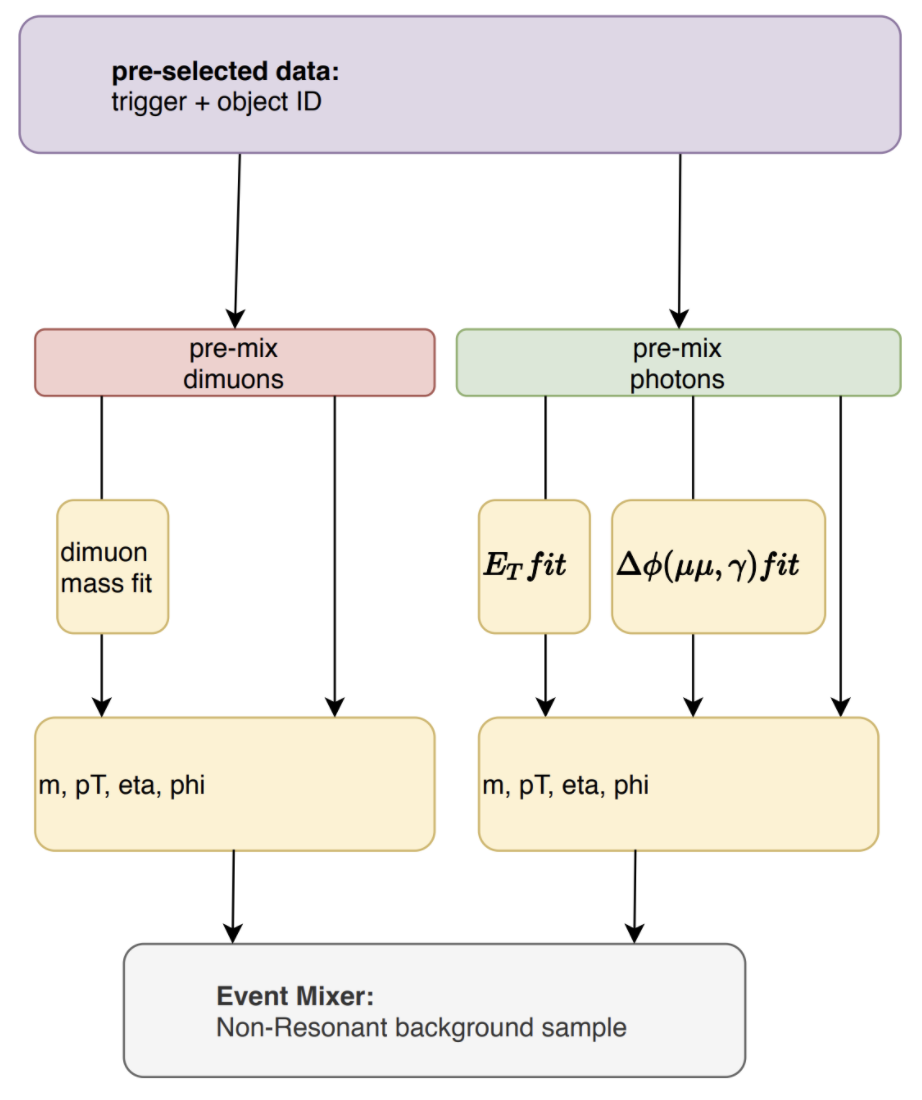

In [0]:
# %%capture
# !pip install uproot coffea numpy matplotlib awkward zfit
# !pip install pylandau

# !wget -N http://ftorresd.web.cern.ch/ftorresd/HZUpsilonPhotonRun2/v01/muon_id/HZZ4l/sel_Run2016B-17Jul2018_ver1_2016.coffea
# !wget -N http://ftorresd.web.cern.ch/ftorresd/HZUpsilonPhotonRun2/v01/muon_id/HZZ4l/sel_Run2016B-17Jul2018_ver2_2016.coffea
# !wget -N http://ftorresd.web.cern.ch/ftorresd/HZUpsilonPhotonRun2/v01/muon_id/HZZ4l/sel_Run2016C-17Jul2018_2016.coffea 
# !wget -N http://ftorresd.web.cern.ch/ftorresd/HZUpsilonPhotonRun2/v01/muon_id/HZZ4l/sel_Run2016D-17Jul2018_2016.coffea     
# !wget -N http://ftorresd.web.cern.ch/ftorresd/HZUpsilonPhotonRun2/v01/muon_id/HZZ4l/sel_Run2016E-17Jul2018_2016.coffea      
# !wget -N http://ftorresd.web.cern.ch/ftorresd/HZUpsilonPhotonRun2/v01/muon_id/HZZ4l/sel_Run2016F-17Jul2018_2016.coffea      
# !wget -N http://ftorresd.web.cern.ch/ftorresd/HZUpsilonPhotonRun2/v01/muon_id/HZZ4l/sel_Run2016G-17Jul2018_2016.coffea     
# !wget -N http://ftorresd.web.cern.ch/ftorresd/HZUpsilonPhotonRun2/v01/muon_id/HZZ4l/sel_Run2016H-17Jul2018_2016.coffea      
# !wget -N http://ftorresd.web.cern.ch/ftorresd/HZUpsilonPhotonRun2/v01/muon_id/HZZ4l/sel_Run2017B-31Mar2018-v1_2017.coffea  
# !wget -N http://ftorresd.web.cern.ch/ftorresd/HZUpsilonPhotonRun2/v01/muon_id/HZZ4l/sel_Run2017C-31Mar2018-v1_2017.coffea   
# !wget -N http://ftorresd.web.cern.ch/ftorresd/HZUpsilonPhotonRun2/v01/muon_id/HZZ4l/sel_Run2017D-31Mar2018-v1_2017.coffea  
# !wget -N http://ftorresd.web.cern.ch/ftorresd/HZUpsilonPhotonRun2/v01/muon_id/HZZ4l/sel_Run2017E-31Mar2018-v1_2017.coffea         
# !wget -N http://ftorresd.web.cern.ch/ftorresd/HZUpsilonPhotonRun2/v01/muon_id/HZZ4l/sel_Run2017F-31Mar2018-v1_2017.coffea    
# !wget -N http://ftorresd.web.cern.ch/ftorresd/HZUpsilonPhotonRun2/v01/muon_id/HZZ4l/sel_Run2018A-17Sep2018-v1_2018.coffea        
# !wget -N http://ftorresd.web.cern.ch/ftorresd/HZUpsilonPhotonRun2/v01/muon_id/HZZ4l/sel_Run2018B-17Sep2018-v1_2018.coffea        
# !wget -N http://ftorresd.web.cern.ch/ftorresd/HZUpsilonPhotonRun2/v01/muon_id/HZZ4l/sel_Run2018C-17Sep2018-v1_2018.coffea        
# !wget -N http://ftorresd.web.cern.ch/ftorresd/HZUpsilonPhotonRun2/v01/muon_id/HZZ4l/sel_Run2018D-PromptReco-v2_2018.coffea     


# !rm -rf sample_data


In [0]:
# %%capture
# !wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
# !bash Miniconda3-latest-Linux-x86_64.sh -b 

# !~/miniconda3/bin/conda init
# !conda deactivate ; conda deactivate 

# !. /root/miniconda3/etc/profile.d/conda.sh ; conda install -y -c conda-forge root

# !rm -rf Miniconda3-latest-Linux-x86_64.sh


In [0]:
import uproot
import coffea
import numpy as np
# import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt

import random


# histogram creation and manipulation
from coffea import hist

from pprint import pprint
import awkward

import tensorflow as tf
import pylandau

from IPython.display import display, Markdown, Latex

import sys
sys.path.append('/root/miniconda3/lib')

import math

In [0]:
def mprint(to_print):
    display(Markdown(to_print))

### Load data and merge it

In [0]:
data_2018A = coffea.util.load("sel_Run2018A-17Sep2018-v1_2018.coffea")
data_2018B = coffea.util.load("sel_Run2018B-17Sep2018-v1_2018.coffea")
data_2018C = coffea.util.load("sel_Run2018C-17Sep2018-v1_2018.coffea")
data_2018D = coffea.util.load("sel_Run2018D-PromptReco-v2_2018.coffea")


In [6]:
data_2018 = data_2018A + data_2018B + data_2018C + data_2018D

for k in data_2018.keys():
  print(k)


dimuon_mass_for_upsilon_fit
dimuon_mass_for_upsilon_fit_weights_sign
leadmu_pt
leadmu_eta
leadmu_phi
trailmu_pt
trailmu_eta
trailmu_phi
photon_pt
photon_eta
photon_phi
photon_calibEnergy
photon_calibEt
photon_etasc
upsilon_pt
upsilon_eta
upsilon_phi
upsilon_mass
boson_pt
boson_eta
boson_phi
boson_mass
delta_R_leading_photon
delta_R_leading_photon_mask
delta_R_trailing_photon
delta_R_trailing_photon_mask
delta_R_upsilon_photon
delta_R_upsilon_photon_mask
delta_Phi_leading_photon
delta_Phi_leading_photon_mask
et_photon_over_M_boson
et_photon_over_M_boson_mask
pt_upsilon_over_M_boson
pt_upsilon_over_M_boson_mask
cutflow
run
event
lumis
isData
nVtx
nGoodVtx
isPVGood
vtx
vty
vtz
rho
rhoCentral
L1ECALPrefire
L1ECALPrefireUp
L1ECALPrefireDown
HLTEleMuX
HLTPho
HLTPhoRejectedByPS
HLTJet
HLTEleMuXIsPrescaled
HLTPhoIsPrescaled
HLTJetIsPrescaled
one_photon
evtWeight_sign
total_weight


In [0]:
pass_kin_cuts = data_2018["delta_R_leading_photon_mask"].value.astype(bool) & data_2018["delta_R_trailing_photon_mask"].value.astype(bool) & data_2018["delta_R_upsilon_photon_mask"].value.astype(bool) & data_2018["delta_Phi_leading_photon_mask"].value.astype(bool) & data_2018["et_photon_over_M_boson_mask"].value.astype(bool) & data_2018["pt_upsilon_over_M_boson_mask"].value.astype(bool)



## $m_{\mu\mu}$ invariant mass fit

In [8]:
dimuon_inv_mass = data_2018["dimuon_mass_for_upsilon_fit"].value
pprint(dimuon_inv_mass)

array([ 3.0945487 , 94.02357769, 47.28904827, ..., 13.96046739,
       49.73587617, 89.06039668])


In [0]:
# Two types of axes exist presently: bins and categories
dimuon_inv_mass_histo = hist.Hist("Events",
                              hist.Cat("source", "Source:"),
#                               hist.Bin("pt", "$p_{T}$", 30, 0, 300),
#                               hist.Bin("eta", "$\eta$", 30, -2.4, +2.4),
#                               hist.Bin("phi", "$\phi$", 30, -4, +4),
                              hist.Bin("mass", r"$m_{\mu\mu}$", 100, 8, 11),
#                               hist.Bin("mass", "$m_{\mu\mu\gamma}$", 50, 60, 130),
                             )

dimuon_inv_mass_histo.fill(
                    source="Data", 
#                     pt=all_triplets_mc.pt.flatten(), 
#                     eta=all_triplets_mc.eta.flatten(),
#                     phi=all_triplets_mc.phi.flatten(),
                    mass=dimuon_inv_mass,
                )


/usr/local/lib/python3.6/dist-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


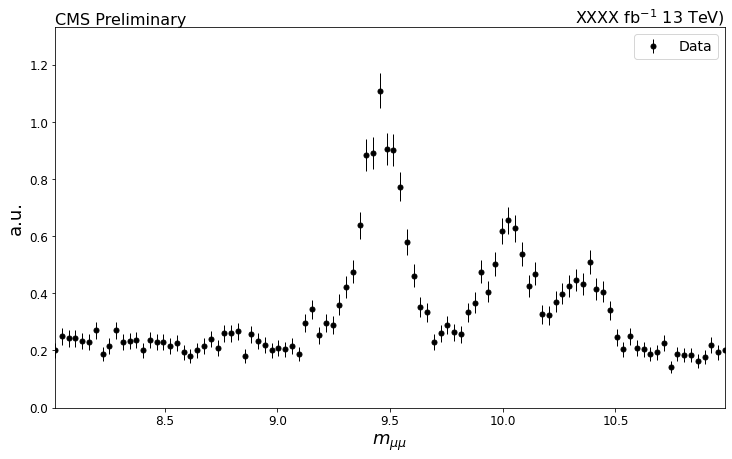

In [10]:
# make a nice ratio plot
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})
fig, ax = plt.subplots(1, 1, figsize=(12,7))
fig.subplots_adjust(hspace=.07)

# Here is an example of setting up a color cycler to color the various fill patches
# http://colorbrewer2.org/#type=qualitative&scheme=Paired&n=6
from cycler import cycler
colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']
ax.set_prop_cycle(cycler(color=colors))

fill_opts = {
    'edgecolor': (0,0,0,0.3),
    'alpha': 0.8
}
error_opts = {
    'label':'Stat. Unc.',
    'hatch':'///',
    'facecolor':'none',
    'edgecolor':(0,0,0,.5),
    'linewidth': 0
}
data_err_opts = {
    'linestyle':'none',
    'marker': '.',
    'markersize': 10.,
    'color':'k',
    'elinewidth': 1,
}

hist.plot1d(dimuon_inv_mass_histo["Data"],
            overlay="source",
            ax=ax,
            clear=False,
            error_opts=data_err_opts,
            density=True,
           )

ax.autoscale(axis='x', tight=True)
ax.set_ylabel("a.u.")
leg = ax.legend()

coffee = plt.text(0., 1., u"CMS Preliminary",
                  fontsize=16,
                  horizontalalignment='left',
                  verticalalignment='bottom',
                  transform=ax.transAxes
                 )
lumi = plt.text(1., 1., r"XXXX fb$^{-1}$ 13 TeV)",
                fontsize=16,
                horizontalalignment='right',
                verticalalignment='bottom',
                transform=ax.transAxes
               )

### Perform the fit

In [0]:
import tensorflow as tf
import zfit

In [12]:
# define the observable
obs = zfit.Space('dimuon_mass', limits=(8, 11))

# upsilon masses and scale
m_1S = zfit.Parameter("m_1S", 9.46, floating=False)
m_2S = zfit.Parameter("m_2S", 10.02, floating=False)
m_3S = zfit.Parameter("m_3S", 10.35, floating=False)


scale = zfit.Parameter("scale", 1.0,  0, 10, floating=True)
sigma = zfit.Parameter("sigma", 1.3,  0, 5, floating=True)


# 1S Signal
mu_1S = zfit.ComposedParameter("mu_1S", lambda m_1S, scale: m_1S*scale, params=[m_1S, scale])

sigma_1S = zfit.ComposedParameter("sigma_1S", lambda m_XS, m_1S, sigma: m_XS/m_1S*sigma, params=[m_1S, m_1S, sigma])
# sigma_1S = zfit.Parameter("sigma_1S", 1.3,  0, 5)
frac_1S = zfit.Parameter("frac_1S", 0.333,  0, 1)
gauss_1S = zfit.pdf.Gauss(obs=obs, mu=mu_1S, sigma=sigma_1S)

# 2S Signal

mu_2S = zfit.ComposedParameter("mu_2S", lambda m_2S, scale: m_2S*scale, params=[m_2S, scale])

sigma_2S = zfit.ComposedParameter("sigma_2S", lambda m_XS, m_1S, sigma: m_XS/m_1S*sigma, params=[m_2S, m_1S, sigma])
# sigma_2S = zfit.Parameter("sigma_2S", 1.3,  0, 5)
frac_2S = zfit.Parameter("frac_2S", 0.333,  0, 1)
gauss_2S = zfit.pdf.Gauss(obs=obs, mu=mu_2S, sigma=sigma_2S)

# 3S Signal
mu_3S = zfit.ComposedParameter("mu_3S", lambda m_3S, scale: m_3S*scale, params=[m_3S, scale])

sigma_3S = zfit.ComposedParameter("sigma_3S", lambda m_XS, m_1S, sigma: m_XS/m_1S*sigma, params=[m_3S, m_1S, sigma])
# sigma_3S = zfit.Parameter("sigma_3S", 1.3,  0, 5)
frac_3S = zfit.Parameter("frac_3S", 0.333,  0, 1)
gauss_3S = zfit.pdf.Gauss(obs=obs, mu=mu_3S, sigma=sigma_3S)

# define a total signal model
signal_model = zfit.pdf.SumPDF(pdfs=[gauss_1S, gauss_2S, gauss_3S], fracs=[frac_1S, frac_2S], name="signal_model")


# background model
a_0 = zfit.Parameter("a_0", 0, -10, 10)
a_1 = zfit.Parameter("a_1", 0, -10, 10)
background_model = zfit.pdf.Chebyshev(obs, coeffs = [a_0], name="background_model")


# total model
frac_signal = zfit.Parameter("frac_signal", 0.333,  0, 1)
total_model = zfit.pdf.SumPDF(pdfs=[signal_model, background_model], fracs=[frac_signal], name="total_model")



/usr/local/lib/python3.6/dist-packages/zfit/core/parameter.py:637: DeprecationWarning: The `value_fn` for composed parameters should take the same number of arguments as `params` are given.
  " of arguments as `params` are given.", DeprecationWarning)


In [13]:

# fill the zfit dataset
data = zfit.Data.from_numpy(obs=obs, array=dimuon_inv_mass)

# Stage 1: create an unbinned likelihood with the given PDF and dataset
nll = zfit.loss.UnbinnedNLL(model=total_model, data=data)

# Stage 2: instantiate a minimiser (in this case a basic minuit
minimizer = zfit.minimize.Minuit()

# Stage 3: minimise the given negative likelihood
result = minimizer.minimize(nll)

pprint(result)
pprint(total_model)
pprint(total_model.get_params())


/usr/local/lib/python3.6/dist-packages/zfit/minimizers/minimizer_minuit.py:175: DeprecationWarning: set_strategy is deprecated: use :attr:`strategy` instead
  minimizer.set_strategy(strategy)
/usr/local/lib/python3.6/dist-packages/zfit/models/polynomials.py:27: UserWarning: The function <function Space.limit1d at 0x7fdd8c36a268> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('dimuon_mass',), axes=(0,), limits=(array([[8.]]), array([[11.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  lim_low, lim_high = limits.limit1d
/usr/local/lib/python3.6/dist-packages/zfit/models/polynomials.py:276: UserWarning: The function <function Space.area at 0x7fdd8c36a048> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('dimuon_mass',), axes=(0,), limits=(array([[8.]]), array([[11.]]))> can also have functi

------------------------------------------------------------------
| FCN = 9364                    |     Ncalls=386 (386 total)     |
| EDM = 0.000311 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
<zfit.SumPDF  params=[Composed_autoparam_2, frac_signal] dtype=float64>0
OrderedSet([<zfit.Parameter 'frac_signal' floating=True value=0.353>, <zfit.Parameter 'frac_1S' floating=True value=0.5276>

In [14]:
# Some simple matplotlib configurations

lower, upper = obs.limits
# data_np = zfit.run(data)
# counts, bin_edges = np.histogram(data_np, 80, range=(lower[-1][0], upper[0][0]))
# bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
# err = np.sqrt(counts)
# plt.errorbar(bin_centres, counts, yerr=err, fmt='o', color='xkcd:black')

x_plot = np.linspace(lower[-1][0], upper[0][0], num=10000)
plot_1S = zfit.run(gauss_1S.pdf(x_plot, norm_range=obs))
plot_2S = zfit.run(gauss_2S.pdf(x_plot, norm_range=obs))
plot_3S = zfit.run(gauss_3S.pdf(x_plot, norm_range=obs))
plot_bkg = zfit.run(background_model.pdf(x_plot, norm_range=obs))
plot_total = zfit.run(total_model.pdf(x_plot, norm_range=obs))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The function <function Space.limits at 0x7fdd8c363bf8> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('dimuon_mass',), axes=None, limits=(array([[8.]]), array([[11.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  This is separate from the ipykernel package so we can avoid doing imports until


/usr/local/lib/python3.6/dist-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


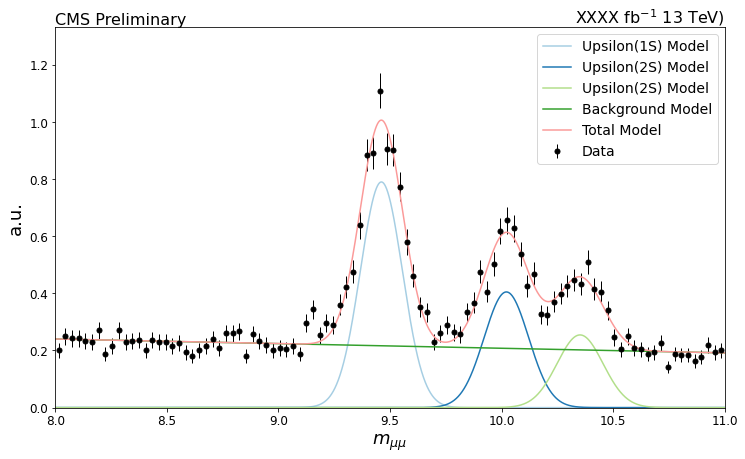

In [15]:

fig, ax = plt.subplots(1, 1, figsize=(12,7))
fig.subplots_adjust(hspace=.07)
ax.set_prop_cycle(cycler(color=colors))


hist.plot1d(dimuon_inv_mass_histo["Data"],
            overlay="source",
            ax=ax,
            clear=False,
            error_opts=data_err_opts,
            density=True,
           )
plt.plot(x_plot,plot_1S*result.params[frac_1S]['value']*result.params[frac_signal]['value'], label='Upsilon(1S) Model')
plt.plot(x_plot,plot_2S*result.params[frac_2S]['value']*result.params[frac_signal]['value'], label='Upsilon(2S) Model')
plt.plot(x_plot,plot_3S*(1-result.params[frac_1S]['value']-result.params[frac_2S]['value'])*result.params[frac_signal]['value'], label='Upsilon(2S) Model')
plt.plot(x_plot,plot_bkg*(1-result.params[frac_signal]['value']), label='Background Model')
plt.plot(x_plot,plot_total, label='Total Model')

ax.autoscale(axis='x', tight=True)
ax.set_ylabel("a.u.")
leg = ax.legend()

coffee = plt.text(0., 1., u"CMS Preliminary",
                  fontsize=16,
                  horizontalalignment='left',
                  verticalalignment='bottom',
                  transform=ax.transAxes
                 )
lumi = plt.text(1., 1., r"XXXX fb$^{-1}$ 13 TeV)",
                fontsize=16,
                horizontalalignment='right',
                verticalalignment='bottom',
                transform=ax.transAxes
               )

In [16]:
def get_sampled_dimuon_mass(n_entries):
    sampler = total_model.create_sampler(n=n_entries,fixed_params=True)
    sampler.resample()
    return sampler.numpy().flatten()

pprint(get_sampled_dimuon_mass(5))
    
    

array([ 9.58532399, 10.1245318 , 10.36951446,  8.36941633, 10.41372798])


## $E_{T}^{\gamma}$ distribution:

In [0]:
photon_pt = data_2018["photon_pt"].value[pass_kin_cuts]


In [0]:
# Two types of axes exist presently: bins and categories
photon_pt_histo = hist.Hist("Events",
                              hist.Cat("source", "Source:"),
                              hist.Bin("pt", "$E_{T}$", 200, 0, 200),
#                               hist.Bin("eta", "$\eta$", 30, -2.4, +2.4),
#                               hist.Bin("phi", "$\phi$", 30, -4, +4),
                              # hist.Bin("mass", r"$m_{\mu\mu}$", 100, 8, 11),
#                               hist.Bin("mass", "$m_{\mu\mu\gamma}$", 50, 60, 130),
                             )

photon_pt_histo.fill(
                    source="Data", 
                    pt=photon_pt, 
#                     eta=all_triplets_mc.eta.flatten(),
#                     phi=all_triplets_mc.phi.flatten(),
                    # mass=photon_pt,
                )


/usr/local/lib/python3.6/dist-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


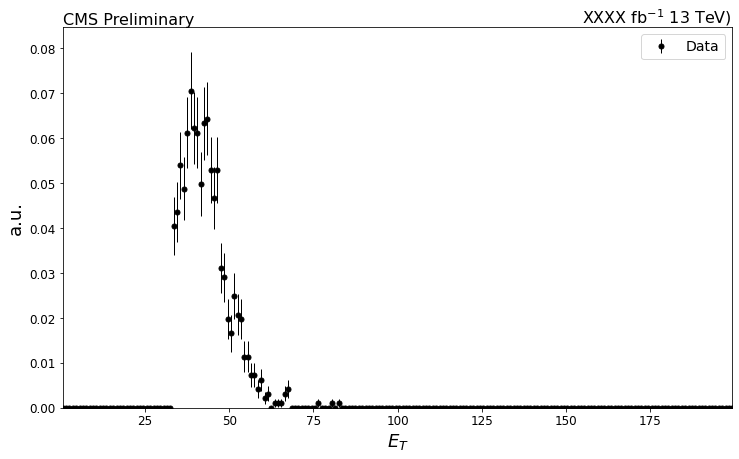

In [19]:

fig, ax = plt.subplots(1, 1, figsize=(12,7))
fig.subplots_adjust(hspace=.07)
ax.set_prop_cycle(cycler(color=colors))


hist.plot1d(photon_pt_histo["Data"],
            overlay="source",
            ax=ax,
            clear=False,
            error_opts=data_err_opts,
            density=True,
           )


ax.autoscale(axis='x', tight=True)
ax.set_ylabel("a.u.")
leg = ax.legend()
# ax.set_yscale('log')

coffee = plt.text(0., 1., u"CMS Preliminary",
                  fontsize=16,
                  horizontalalignment='left',
                  verticalalignment='bottom',
                  transform=ax.transAxes
                 )
lumi = plt.text(1., 1., r"XXXX fb$^{-1}$ 13 TeV)",
                fontsize=16,
                horizontalalignment='right',
                verticalalignment='bottom',
                transform=ax.transAxes
               )

In [0]:
### Roofit

In [21]:
import ROOT
from ROOT import TFile, RooFit, RooExtendPdf, RooRealVar, RooAddPdf, RooArgList, RooExponential, gROOT, TTree, RooLandau, RooGenericPdf, RooBreitWigner, RooCBShape
from ROOT import RooDataSet , RooArgSet, RooBinning, TPaveText, RooPolynomial, RooChebychev, RooExponential, TCanvas, RooPlot, RooFitResult, RooAddPdf, RooArgList, TColor, EColor
from ROOT import TFile, TTree
from ROOT import gROOT, AddressOf



Welcome to JupyROOT 6.20/04


In [22]:
photon_pt_var = RooRealVar("photon_pt_var", "Photon E_{T}", 33, 200., "GeV")

# landau
mean = RooRealVar ("mean", "mean", 20, 0., 200.)
sigma = RooRealVar("sigma", "sigma", 2.5, 0, 5.)
photon_pt_model = RooLandau("photon_pt_model","photon_pt_model", photon_pt_var, mean,sigma)


# gauss
mg = ROOT.RooRealVar("mg", "mg", 0)
sg = ROOT.RooRealVar("sg", "sg", 2, 5, 10)
# sg = ROOT.RooRealVar("sg", "sg", 2)
gauss_model = ROOT.RooGaussian("gauss", "gauss", photon_pt_var, mg, sg)
    
   

[#0] WARNING:InputArguments -- The parameter 'sigma' with range [0, 5] of the RooLandau 'photon_pt_model' exceeds the safe range of (0, inf). Advise to limit its range.


In [0]:
# C o n s t r u c t   c o n v o l u t i o n   p d f
# ---------------------------------------

# Set #bins to be used for FFT sampling to 10000
photon_pt_var.setBins(10000, "cache")

# Construct landau (x) gauss
langau = ROOT.RooFFTConvPdf("lxg", "landau (X) gauss", photon_pt_var, photon_pt_model, gauss_model)

 
# # Construction a uniform pdf
# uniform_model = ROOT.RooPolynomial("uniform_model", "uniform_model", photon_pt_model)
# truncated_langau_model = ROOT.RooProdPdf("truncated_langau", "truncated_langau", ROOT.RooArgList(uniform_model, langau))


In [0]:
photon_pt_data = RooDataSet("photon_pt_data","photon_pt_data", RooArgSet(photon_pt_var))

for pt in photon_pt:
    photon_pt_var.setVal(pt)
    photon_pt_data.add(RooArgSet(photon_pt_var))

In [25]:
# photon_pt_model.fitTo(photon_pt_data)
fit_result = langau.fitTo(photon_pt_data, ROOT.RooFit.Save())
# uniform_model.fitTo(photon_pt_data)
# truncated_langau_model.fitTo(photon_pt_data)
ndof = fit_result.floatParsFinal().getSize()

print(ndof)


3
[#1] INFO:Eval -- RooRealVar::setRange(photon_pt_var) new range named 'refrange_fft_lxg' created with bounds [33,200]
[#1] INFO:NumericIntegration -- RooRealIntegral::init(photon_pt_model_Int[photon_pt_var]) using numeric integrator RooIntegrator1D to calculate Int(photon_pt_var)
[#1] INFO:Caching -- RooAbsCachedPdf::getCache(lxg) creating new cache 0x18858f70 with pdf photon_pt_model_CONV_gauss_CACHE_Obs[photon_pt_var] for nset (photon_pt_var) with code 0
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 mean         2.00000e+01  1.00000e+01    0.00000e+00  2.00000e+02
     2 sg           5.00000e+00  5.00000e-01    5.00000e+00  1.00000e+01
 MINUIT WARNING IN PARAM DEF
 ============== STARTING VALUE IS AT LIMIT.
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE

### p-value: 0.9997325932973482




[#1] INFO:NumericIntegration -- RooRealIntegral::init(photon_pt_model_Int[photon_pt_var]) using numeric integrator RooIntegrator1D to calculate Int(photon_pt_var)
[#1] INFO:Caching -- RooAbsCachedPdf::getCache(lxg) creating new cache 0x18c95fb0 with pdf photon_pt_model_CONV_gauss_CACHE_Obs[photon_pt_var] for nset (photon_pt_var) with code 0
[#1] INFO:Caching -- RooAbsCachedPdf::getCache(lxg) creating new cache 0x18e41040 with pdf photon_pt_model_CONV_gauss_CACHE_Obs[photon_pt_var] for nset (photon_pt_var) with code 0 from preexisting content.


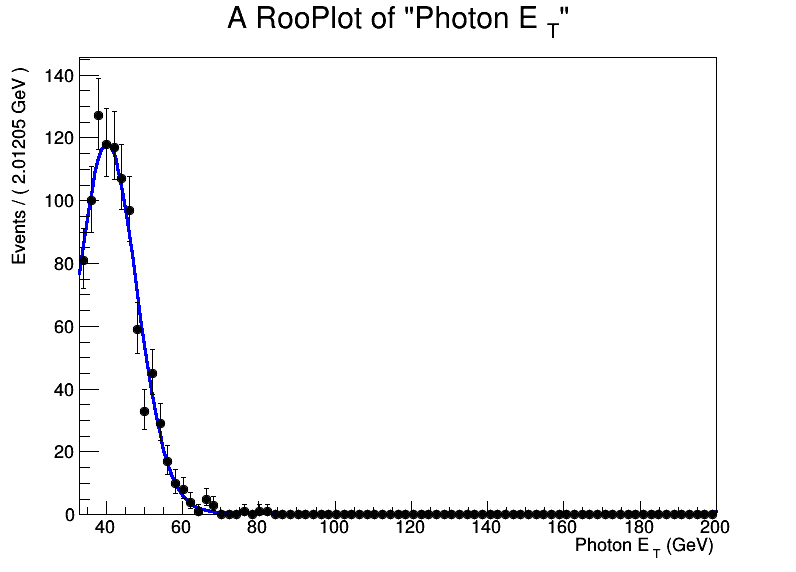

In [26]:
# Plot
nBins = 83
photon_pt_var.setBins(nBins)
chi2 = langau.createChi2(photon_pt_data.binnedClone()).getVal()


nbins_binned_data = photon_pt_data.binnedClone().numEntries()


frame = photon_pt_var.frame(
                            ROOT.RooFit.Name("photon_pt_var"), 
                            ROOT.RooFit.Title(""), 
                            ROOT.RooFit.Bins(nBins),
                            )
photon_pt_data.plotOn(frame)
# photon_pt_model.plotOn(frame)
# langau.plotOn(frame, ROOT.RooFit.LineStyle(ROOT.kDashed))
langau.plotOn(frame)
# uniform_model.plotOn(frame, ROOT.RooFit.LineColor(ROOT.kGreen))
# truncated_langau_model.plotOn(frame, ROOT.RooFit.LineColor(ROOT.kRed))


photon_pt_data.plotOn(frame)
kCanvas = TCanvas("kCanvas", "kCanvas", 800,600)
frame.Draw()
kCanvas.Draw()

mprint((r'### p-value: '+ str(ROOT.TMath.Prob(chi2,nbins_binned_data-1-ndof))))
print("\n\n")


In [27]:
photon_pt_var.setVal(33);
langau.getVal(RooArgSet(photon_pt_var))


0.03953570631060083

[#1] INFO:Caching -- RooAbsCachedPdf::getCache(lxg) creating new cache 0x1916a750 with pdf photon_pt_model_CONV_gauss_CACHE_Obs[photon_pt_var] for nset (photon_pt_var) with code 0 from preexisting content.


In [28]:
def get_sampled_photon_pt(n_entries):
    sampled_photon_pt = []
    sampled_dataset = langau.generate(ROOT.RooArgSet(photon_pt_var), n_entries)
    for i in range(n_entries):
        sampled_photon_pt.append(sampled_dataset.get(i).getRealValue("photon_pt_var"))
    return np.array(sampled_photon_pt)
   
    
sampled_photon_pt = get_sampled_photon_pt(10)
pprint(sampled_photon_pt)

array([47.15422494, 48.04799794, 39.91991792, 36.47962655, 41.36638922,
       39.34731735, 34.87016807, 36.12150477, 36.9239488 , 33.22444621])


## $|\Delta \phi (\mu\mu, \gamma)|$ distribution:

In [0]:
delta_Phi_upsilon_photon = np.absolute((data_2018["upsilon_phi"].value[pass_kin_cuts] - data_2018["photon_phi"].value[pass_kin_cuts] + math.pi) % (2*math.pi) - math.pi)


In [0]:
# Two types of axes exist presently: bins and categories
delta_Phi_histo = hist.Hist("Events",
                              hist.Cat("source", "Source:"),
                              hist.Bin("delta_Phi", r"$|\Delta\phi(\mu\mu, \gamma)|$", 50, 0.0, 4.0),
#                               hist.Bin("eta", "$\eta$", 30, -2.4, +2.4),
#                               hist.Bin("phi", "$\phi$", 30, -4, +4),
                              # hist.Bin("mass", r"$m_{\mu\mu}$", 100, 8, 11),
#                               hist.Bin("mass", "$m_{\mu\mu\gamma}$", 50, 60, 130),
                             )

delta_Phi_histo.fill(
                    source="Data", 
                    delta_Phi=delta_Phi_upsilon_photon, 
#                     eta=all_triplets_mc.eta.flatten(),
#                     phi=all_triplets_mc.phi.flatten(),
                    # mass=photon_pt,
                )


/usr/local/lib/python3.6/dist-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


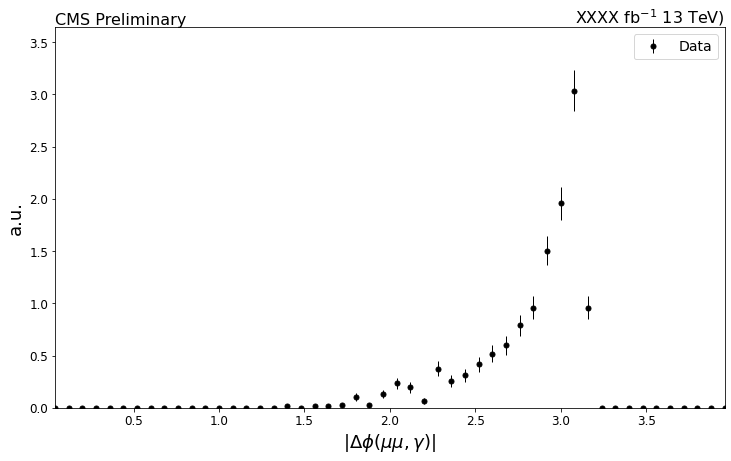

In [31]:

fig, ax = plt.subplots(1, 1, figsize=(12,7))
fig.subplots_adjust(hspace=.07)
ax.set_prop_cycle(cycler(color=colors))


hist.plot1d(delta_Phi_histo["Data"],
            overlay="source",
            ax=ax,
            clear=False,
            error_opts=data_err_opts,
            density=True,
           )


ax.autoscale(axis='x', tight=True)
ax.set_ylabel("a.u.")
leg = ax.legend()
# ax.set_yscale('log')

coffee = plt.text(0., 1., u"CMS Preliminary",
                  fontsize=16,
                  horizontalalignment='left',
                  verticalalignment='bottom',
                  transform=ax.transAxes
                 )
lumi = plt.text(1., 1., r"XXXX fb$^{-1}$ 13 TeV)",
                fontsize=16,
                horizontalalignment='right',
                verticalalignment='bottom',
                transform=ax.transAxes
               )

In [0]:
### Roofit

In [0]:
delta_Phi_var = RooRealVar("delta_Phi_var", "|#Delta#phi(#mu#mu,#gamma)|", 0, math.pi+1e-5, "")

# exponential model
lambda_par = ROOT.RooRealVar("lambda_par", "lambda_par", 1, 0, 100)

exponential_model = ROOT.RooExponential("exponential_model", "exponential_model", delta_Phi_var, lambda_par)

# gauss
expo_mg = ROOT.RooRealVar("expo_mg", "expo_mg", -1.6E6, -5E6, 100)
expo_sg = ROOT.RooRealVar("expo_sg", "expo_sg", 2E6, 0, 10E6)
expo_gauss_model = ROOT.RooGaussian("expo_gauss", "expo_gauss", delta_Phi_var, expo_mg, expo_sg)


f_exp = ROOT.RooRealVar("f_exp","f_exp fraction",0.5,0.,1.)

# model(x) = fsig*sig(x) + (1-fsig)*bkg(x)
# delta_Phi_model = ROOT.RooAddPdf("delta_Phi_model","delta_Phi_model",ROOT.RooArgList(exponential_model,expo_gauss_model),ROOT.RooArgList(f_exp))


delta_Phi_model = exponential_model
    
   

In [0]:
delta_Phi_data = RooDataSet("delta_Phi_data","delta_Phi_data", RooArgSet(delta_Phi_var))

for phi in delta_Phi_upsilon_photon:
    delta_Phi_var.setVal(phi)
    delta_Phi_data.add(RooArgSet(delta_Phi_var))

In [35]:
# photon_pt_model.fitTo(photon_pt_data)
# fit_result = exponential_model.fitTo(delta_Phi_data, ROOT.RooFit.Save())
fit_result = delta_Phi_model.fitTo(delta_Phi_data, ROOT.RooFit.Save())


# uniform_model.fitTo(photon_pt_data)
# truncated_langau_model.fitTo(photon_pt_data)
ndof = fit_result.floatParsFinal().getSize()

print(ndof)


1
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 lambda_par   1.00000e+00  5.00000e-01    0.00000e+00  1.00000e+02
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD         500           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=255.658 FROM MIGRAD    STATUS=INITIATE        4 CALLS           5 TOTAL
                     EDM= unknown      STRATEGY= 1      NO ERROR MATRIX       
  EXT PARAMETER               CURRENT GUESS       STEP         F

### p-value: 0.872133682997601





Warning in <TCanvas::Constructor>: Deleting canvas with same name: kCanvas


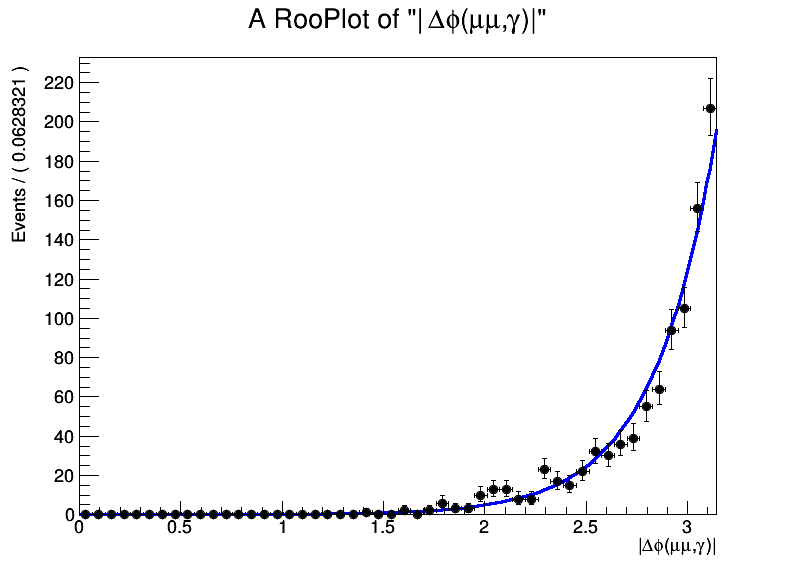

In [36]:
# Plot
nBins = 50
delta_Phi_var.setBins(nBins)
# chi2 = exponential_model.createChi2(delta_Phi_data.binnedClone()).getVal()
chi2 = delta_Phi_model.createChi2(delta_Phi_data.binnedClone()).getVal()



nbins_binned_data = delta_Phi_data.binnedClone().numEntries()


frame = delta_Phi_var.frame(
                            ROOT.RooFit.Name("delta_Phi_var"), 
                            ROOT.RooFit.Title(""), 
                            ROOT.RooFit.Bins(nBins),
                            )
delta_Phi_data.plotOn(frame)
# photon_pt_model.plotOn(frame)
# langau.plotOn(frame, ROOT.RooFit.LineStyle(ROOT.kDashed))

# exponential_model.plotOn(frame)
delta_Phi_model.plotOn(frame)



# uniform_model.plotOn(frame, ROOT.RooFit.LineColor(ROOT.kGreen))
# truncated_langau_model.plotOn(frame, ROOT.RooFit.LineColor(ROOT.kRed))


delta_Phi_data.plotOn(frame)
kCanvas = TCanvas("kCanvas", "kCanvas", 800,600)
frame.Draw()
kCanvas.Draw()

print((r'### p-value: '+ str(ROOT.TMath.Prob(chi2,nbins_binned_data-1-ndof))))
print("\n\n")


In [37]:
delta_Phi_var.setVal(3);
# exponential_model.getVal(RooArgSet(delta_Phi_var))
delta_Phi_model.getVal(RooArgSet(delta_Phi_var))



2.0448164320597058

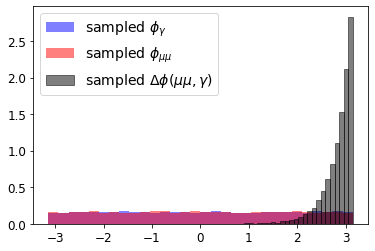

In [38]:
def get_sampled_phi(n_entries):
    sampled_upsilon_phi = np.random.uniform(-math.pi,math.pi,n_entries)
    sampled_photon_phi = []
    # sampled_dataset = exponential_model.generate(ROOT.RooArgSet(delta_Phi_var), n_entries)
    sampled_dataset = delta_Phi_model.generate(ROOT.RooArgSet(delta_Phi_var), n_entries)
    sampled_photon_pt = []
    for i in range(n_entries):
      delta_phi = sampled_dataset.get(i).getRealValue("delta_Phi_var")
      sign = float(random.sample(set([-1, 1]), 1)[0])
      photon_phi = ((sampled_upsilon_phi[i]+sign*delta_phi+math.pi) % (2*math.pi)) - math.pi
      sampled_photon_phi.append(photon_phi)
    return np.array(sampled_photon_phi), np.array(sampled_upsilon_phi)
    
sampled_photon_phi, sampled_upsilon_phi  = get_sampled_phi(10000)

plt.hist(sampled_photon_phi, 30, facecolor='blue', density=True, label = r"sampled $\phi_{\gamma}$", alpha=0.5)
plt.hist(sampled_upsilon_phi, 30, facecolor='red', density=True, label = r"sampled $\phi_{\mu\mu}$", alpha=0.5)
plt.hist(np.absolute((sampled_upsilon_phi - sampled_photon_phi + math.pi) % (2*math.pi) - math.pi), 30, facecolor='black', edgeColor = 'black', density=True, label = r"sampled $\Delta \phi(\mu\mu, \gamma)}$", alpha=0.5)

ax = plt.gca()
# ax.set_ylim(0,.5)
plt.legend()

## Build the Event Mix

Here we build the mix the events, samples the $m_{\mu\mu}$, $E_{T}^{\gamma}$ and $\Delta \phi(\mu\mu, \gamma)$ from the fits above.

In [39]:
pprint(data_2018.keys())


dict_keys(['dimuon_mass_for_upsilon_fit', 'dimuon_mass_for_upsilon_fit_weights_sign', 'leadmu_pt', 'leadmu_eta', 'leadmu_phi', 'trailmu_pt', 'trailmu_eta', 'trailmu_phi', 'photon_pt', 'photon_eta', 'photon_phi', 'photon_calibEnergy', 'photon_calibEt', 'photon_etasc', 'upsilon_pt', 'upsilon_eta', 'upsilon_phi', 'upsilon_mass', 'boson_pt', 'boson_eta', 'boson_phi', 'boson_mass', 'delta_R_leading_photon', 'delta_R_leading_photon_mask', 'delta_R_trailing_photon', 'delta_R_trailing_photon_mask', 'delta_R_upsilon_photon', 'delta_R_upsilon_photon_mask', 'delta_Phi_leading_photon', 'delta_Phi_leading_photon_mask', 'et_photon_over_M_boson', 'et_photon_over_M_boson_mask', 'pt_upsilon_over_M_boson', 'pt_upsilon_over_M_boson_mask', 'cutflow', 'run', 'event', 'lumis', 'isData', 'nVtx', 'nGoodVtx', 'isPVGood', 'vtx', 'vty', 'vtz', 'rho', 'rhoCentral', 'L1ECALPrefire', 'L1ECALPrefireUp', 'L1ECALPrefireDown', 'HLTEleMuX', 'HLTPho', 'HLTPhoRejectedByPS', 'HLTJet', 'HLTEleMuXIsPrescaled', 'HLTPhoIsPresc

In [40]:
dimuons = np.vstack([
    data_2018["upsilon_pt"].value[pass_kin_cuts],
    data_2018["upsilon_eta"].value[pass_kin_cuts],
    # data_2018["upsilon_phi"].value,
])

photons = np.vstack([
    data_2018["photon_eta"].value[pass_kin_cuts],
    # data_2018["photon_phi"].value,
    np.zeros(data_2018["photon_eta"].value[pass_kin_cuts].shape[0])
])

pprint(dimuons.shape)
pprint(photons.shape)

(2, 964)
(2, 964)


In [41]:
n_mix = 500
dimuons = np.hstack([dimuons for i in range(n_mix)])
# pprint(dimuons)
# pprint(dimuons.shape)


mixes = []
for i in range(n_mix):
    mix = np.copy(photons)
#     pprint(mix)
    np.random.shuffle(mix.T)
#     pprint(mix)
    mixes.append(mix)

mixes = np.hstack(mixes)
# pprint(mixes)
    
    
full_mix_buffer = np.vstack([dimuons,mixes])
pprint(full_mix_buffer)
pprint(full_mix_buffer.shape)

mix_size = full_mix_buffer.shape[1]
    


array([[ 4.62444821e+01,  3.16847704e+01,  3.63408619e+01, ...,
         4.32141208e+01,  4.72391874e+01,  3.46989038e+01],
       [ 6.42528242e-01, -3.24423899e-03, -1.33293868e+00, ...,
        -4.34438095e-01, -9.91652352e-01,  1.44596748e-01],
       [ 1.27604619e-01,  1.67281961e+00,  1.30663955e+00, ...,
        -8.23863208e-01, -1.70398843e+00,  8.70929599e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])
(4, 482000)


In [42]:

# full_mix = np.vstack([get_sampled_dimuon_mass(mix_size),full_mix])
sampled_photon_phi, sampled_upsilon_phi  = get_sampled_phi(mix_size)
full_mix = np.vstack([sampled_upsilon_phi, get_sampled_dimuon_mass(mix_size),full_mix_buffer, get_sampled_photon_pt(mix_size), sampled_photon_phi]).T
# full_mix = np.vstack([get_sampled_dimuon_mass(mix_size), full_mix, get_sampled_photon_pt(mix_size)]).T

pprint(full_mix[0])
pprint(full_mix.shape)

array([-1.76583284,  9.44800332, 46.24448208,  0.64252824,  0.12760462,
        0.        , 45.75559903,  1.38552854])
(482000, 8)


## Filters the mixing sample to the signal selection

#### `full_mix` structure: 
```
full_mix ==> [
        0 : upsilon_phi,
        1 : upsilon_mass,
        2 : upsilon_pt,
        3 : upsilon_eta,
        4 : photon_eta,
        5 : photon_mass,
        6 : photon_pt,
        7 : photon_phi,
        ]
```

## $\mu\mu\gamma$ invariant mass distribution

#### Get nominal distribution:

In [0]:
side_bands = ((data_2018["boson_mass"].value[pass_kin_cuts] < 80.) | (data_2018["boson_mass"].value[pass_kin_cuts] > 100.)) & ((data_2018["boson_mass"].value[pass_kin_cuts] > 0) * (data_2018["boson_mass"].value[pass_kin_cuts] < 120.))
nominal_scale = side_bands.sum()

# Two types of axes exist presently: bins and categories
bosons_histo = hist.Hist("Events",
                              hist.Cat("source", "Source:"),
#                               hist.Bin("pt", "$p_{T}$", 30, 0, 300),
#                               hist.Bin("eta", "$\eta$", 30, -2.4, +2.4),
#                               hist.Bin("phi", "$\phi$", 30, -4, +4),
                              hist.Bin("mass", r"$m_{\mu\mu\gamma}$", 50, 70, 120),
#                               hist.Bin("mass", "$m_{\mu\mu\gamma}$", 50, 60, 130),
                             )

bosons_histo.fill(
                    source="Data", 
#                     pt=all_triplets_mc.pt.flatten(), 
#                     eta=all_triplets_mc.eta.flatten(),
#                     phi=all_triplets_mc.phi.flatten(),
                    mass=data_2018["boson_mass"].value[pass_kin_cuts][side_bands],
                )


In [0]:
# np.savetxt("boson_mass.csv", data_2018["boson_mass"].value[pass_kin_cuts])

#### Get event mix distribution:

In [0]:
from coffea.analysis_objects import JaggedCandidateArray
full_mix_dimuons = JaggedCandidateArray.candidatesfromcounts(
                counts = np.ones(mix_size).astype(int),
                pt = full_mix[:,2],
                eta = full_mix[:,3],
                phi = full_mix[:,0],
                mass = full_mix[:,1],
            )

full_mix_photons = JaggedCandidateArray.candidatesfromcounts(
                counts = np.ones(mix_size).astype(int),
                pt = full_mix[:,6],
                eta = full_mix[:,4],
                phi = full_mix[:,7],
                mass = full_mix[:,5],
            )
full_mix_bosons = full_mix_dimuons.cross(full_mix_photons)
full_mix_bosons = full_mix_bosons[full_mix_bosons.i0.pt < 300.]
full_mix_bosons = full_mix_bosons[full_mix_bosons.counts > 0]

full_mix_bosons = full_mix_bosons[full_mix_bosons.i0.p4.delta_r(full_mix_bosons.i1.p4) > 2]
full_mix_bosons = full_mix_bosons[np.absolute(full_mix_bosons.i0.p4.delta_phi(full_mix_bosons.i1.p4)) > 1.5]
full_mix_bosons = full_mix_bosons[(full_mix_bosons.i1.pt/full_mix_bosons.mass) > 35.0/91.1876]
full_mix_bosons = full_mix_bosons[(full_mix_bosons.i0.pt/full_mix_bosons.mass) > 35.0/91.1876]

# filter mass
full_mix_bosons = full_mix_bosons[(full_mix_bosons.mass > 70) & ((full_mix_bosons.mass < 120))]
                                


In [0]:
side_bands_mixed = ((full_mix_bosons.mass.flatten() < 80.) | (full_mix_bosons.mass.flatten() > 100.)) & ((full_mix_bosons.mass.flatten() > 70.) & (full_mix_bosons.mass.flatten() < 120.))

bosons_histo.fill(
                    source="Mixed", 
#                     pt=all_triplets_mc.pt.flatten(), 
#                     eta=all_triplets_mc.eta.flatten(),
#                     phi=all_triplets_mc.phi.flatten(),
#                     mass=mixed_bosons.mass.flatten()[((mixed_bosons.mass.flatten() > 0) & (mixed_bosons.mass.flatten() < 120.))],
                    mass=full_mix_bosons.mass.flatten(),
                )

mixed_scale = side_bands_mixed.sum()
scaling_factor = float(nominal_scale)/float(mixed_scale)

bosons_histo.scale({'Data': 1., 'Mixed': scaling_factor}, axis='source')



## $m_{\mu\mu\gamma}$ distribution after mixing

/usr/local/lib/python3.6/dist-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


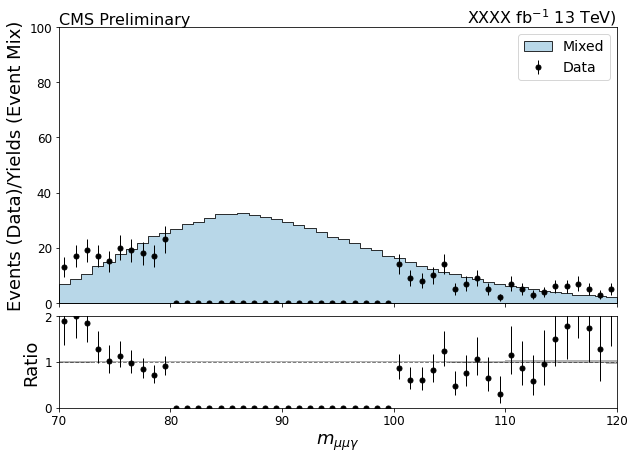

In [47]:
# make a nice ratio plot
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})
fig, (ax, rax) = plt.subplots(2, 1, figsize=(10,7), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
fig.subplots_adjust(hspace=.07)

# Here is an example of setting up a color cycler to color the various fill patches
# http://colorbrewer2.org/#type=qualitative&scheme=Paired&n=6
from cycler import cycler
colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']
ax.set_prop_cycle(cycler(color=colors))

fill_opts = {
    'edgecolor': (0,0,0,0.3),
    'alpha': 0.8
}
error_opts = {
    'label':'Stat. Unc.',
    'hatch':'///',
    'facecolor':'none',
    'edgecolor':(0,0,0,.5),
    'linewidth': 0
}
data_err_opts = {
    'linestyle':'none',
    'marker': '.',
    'markersize': 10.,
    'color':'k',
    'elinewidth': 1,
}

hist.plot1d(bosons_histo["Mixed"],
            overlay="source",
            ax=ax,
            clear=False,
            stack=False,
            line_opts=None,
            fill_opts=fill_opts,
            error_opts=error_opts,
#             density=True,
           )
hist.plot1d(bosons_histo["Data"],
            overlay="source",
            ax=ax,
            clear=False,
            error_opts=data_err_opts,
#             density=True,
           )

ax.autoscale(axis='x', tight=True)
ax.set_ylim(0, 100)

ax.set_xlabel(None)
ax.set_ylabel("Events (Data)/Yields (Event Mix)")
leg = ax.legend()

hist.plotratio(bosons_histo["Data"].sum("source"), bosons_histo["Mixed"].sum("source"),
               ax=rax,
               error_opts=data_err_opts,
               denom_fill_opts={},
               guide_opts={},
               unc='num'
              )
rax.set_ylabel('Ratio')
rax.set_ylim(0,2)



coffee = plt.text(0., 1., u"CMS Preliminary",
                  fontsize=16,
                  horizontalalignment='left',
                  verticalalignment='bottom',
                  transform=ax.transAxes
                 )
lumi = plt.text(1., 1., r"XXXX fb$^{-1}$ 13 TeV)",
                fontsize=16,
                horizontalalignment='right',
                verticalalignment='bottom',
                transform=ax.transAxes
               )

## $m_{\mu\mu\gamma}$ fit 

3
### p-value: 4.356183546968348e-46



[#1] INFO:Eval -- RooRealVar::setRange(boson_mass_var) new range named 'LEFT' created with bounds [70,80]
[#1] INFO:Eval -- RooRealVar::setRange(boson_mass_var) new range named 'RIGHT' created with bounds [100,120]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_boson_mass_model_boson_mass_data_LEFT) constructing test statistic for sub-range named LEFT
[#1] INFO:Eval -- RooRealVar::setRange(boson_mass_var) new range named 'NormalizationRangeForLEFT' created with bounds [70,120]
[#1] INFO:Eval -- RooRealVar::setRange(boson_mass_var) new range named 'fit_nll_boson_mass_model_boson_mass_data_LEFT' created with bounds [70,80]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_boson_mass_model_boson_mass_data_LEFT) fixing interpretation of coefficients of any RooAddPdf to full domain of observables 
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_boson_mass_model_boson_mass_data_RIGHT) constructing test statistic for sub-range named RIG

Warning in <TCanvas::Constructor>: Deleting canvas with same name: kCanvas


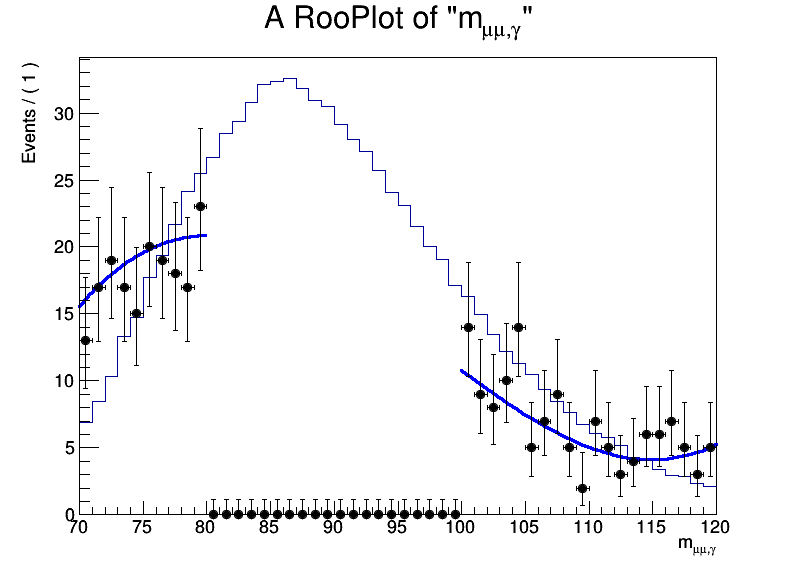

In [48]:
boson_mass_var = RooRealVar("boson_mass_var", "m_{#mu#mu,#gamma}", 70, 120, "")

# exponential model
b0 = ROOT.RooRealVar("b0", "b0", 1, -10, 10)
b1 = ROOT.RooRealVar("b1", "b1", 1, -10, 10)
b2 = ROOT.RooRealVar("b2", "b2", 1, -10, 10)
b3 = ROOT.RooRealVar("b3", "b3", 1, -10, 10)
b4 = ROOT.RooRealVar("b4", "b3", 1, -10, 10)
b5 = ROOT.RooRealVar("b5", "b3", 1, -10, 10)
b6 = ROOT.RooRealVar("b6", "b3", 1, -10, 10)
b7 = ROOT.RooRealVar("b7", "b3", 1, -10, 10)

# argus_m0 = ROOT.RooRealVar("argus_m0", "argus_m0", 1, 80, 150)
# argus_c = ROOT.RooRealVar("argus_c", "argus_c", 1, 0, 30)
# argus_p = ROOT.RooRealVar("argus_p", "argus_p", 1)

# boson_mass_model = ROOT.RooBernstein("boson_mass_model", "boson_mass_model", boson_mass_var, RooArgList(b0, b1, b2, b3, b4))
# boson_mass_model = ROOT.RooArgusBG("boson_mass_model", "boson_mass_model", boson_mass_var, argus_m0, argus_c, argus_p)



coef0 = ROOT.RooRealVar("c0","coefficient #0",1.0,-1.,1)
coef1 = ROOT.RooRealVar("c1","coefficient #1",0.1,-1.,1)
coef2 = ROOT.RooRealVar("c2","coefficient #2",-0.1,-1.,1)
coef3 = ROOT.RooRealVar("c3","coefficient #3",-0.1,-1.,1)

boson_mass_model = ROOT.RooChebychev("boson_mass_model","boson_mass_model", boson_mass_var, ROOT.RooArgList(coef0, coef1, coef2))


 
boson_mass_data = RooDataSet("boson_mass_data","boson_mass_data", RooArgSet(boson_mass_var))
for mass in data_2018["boson_mass"].value[pass_kin_cuts][side_bands]:
    boson_mass_var.setVal(mass)
    boson_mass_data.add(RooArgSet(boson_mass_var))



boson_mass_var.setRange("LEFT", 70, 80);
boson_mass_var.setRange("RIGHT", 100, 120);
fit_result = boson_mass_model.fitTo(boson_mass_data, ROOT.RooFit.Range("LEFT,RIGHT"), ROOT.RooFit.Save())


ndof = fit_result.floatParsFinal().getSize()

print(ndof)
# Plot
nBins = 50
boson_mass_var.setBins(nBins)
chi2 = boson_mass_model.createChi2(boson_mass_data.binnedClone()).getVal()


nbins_binned_data = boson_mass_data.binnedClone().numEntries()


frame = boson_mass_var.frame(
                            ROOT.RooFit.Name("boson_mass_var"), 
                            ROOT.RooFit.Title(""), 
                            ROOT.RooFit.Bins(nBins),
                            )
boson_mass_data.plotOn(frame)
# Data
boson_mass_model.plotOn(frame)

# Mixed
h_mixed_boson_mass = ROOT.TH1F( 'h_mixed_boson_mass', 'h_mixed_boson_mass', nBins, 70, 120 )
for mass in full_mix_bosons.mass.flatten():
  if mass >= 70 and mass < 120:
    h_mixed_boson_mass.Fill(mass, scaling_factor)

frame.addTH1(h_mixed_boson_mass, "hist")

boson_mass_data.plotOn(frame)
kCanvas = TCanvas("kCanvas", "kCanvas", 800,600)
frame.Draw()
kCanvas.Draw()

print((r'### p-value: '+ str(ROOT.TMath.Prob(chi2,nbins_binned_data-1-ndof))))
print("\n\n")


## $m_{\mu\mu\gamma}$  (Mixed)fit 

5
### p-value: 1.5802178721558882e-234



[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 b0_mixed     1.00000e+00  2.00000e+00   -1.00000e+01  1.00000e+01
     2 b1_mixed     1.00000e+00  2.00000e+00   -1.00000e+01  1.00000e+01
     3 b2_mixed     1.00000e+00  2.00000e+00   -1.00000e+01  1.00000e+01
     4 b3_mixed     1.00000e+00  2.00000e+00   -1.00000e+01  1.00000e+01
     5 b4_mixed     1.00000e+00  2.00000e+00   -1.00000e+01  1.00000e+01
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        2500           1
 **********
 FIRST CALL TO USER FUNCTION 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: kCanvas


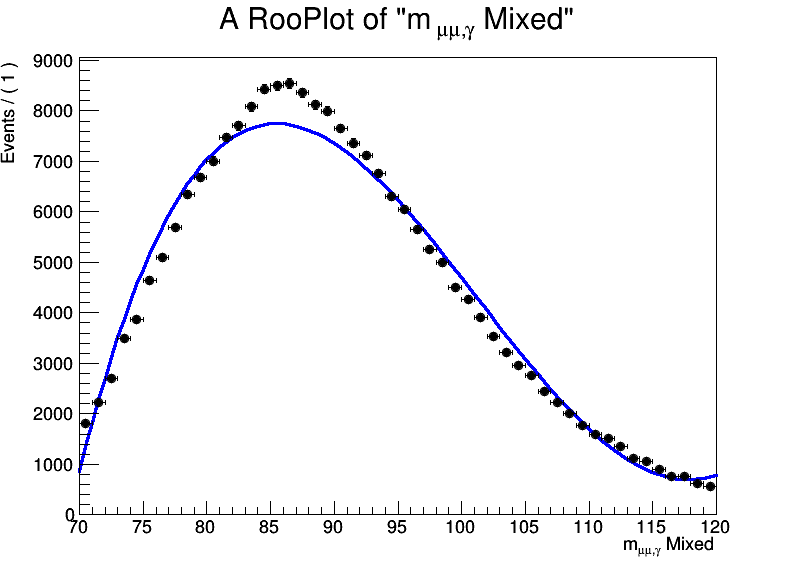

In [49]:
boson_mass_mixed_var = RooRealVar("boson_mass_mixed_var", "m_{#mu#mu,#gamma} Mixed", 70, 120, "")

# exponential model
b0_mixed = ROOT.RooRealVar("b0_mixed", "b0", 1, -10, 10)
b1_mixed = ROOT.RooRealVar("b1_mixed", "b1", 1, -10, 10)
b2_mixed = ROOT.RooRealVar("b2_mixed", "b2", 1, -10, 10)
b3_mixed = ROOT.RooRealVar("b3_mixed", "b3", 1, -10, 10)
b4_mixed = ROOT.RooRealVar("b4_mixed", "b3", 1, -10, 10)
b5_mixed = ROOT.RooRealVar("b5_mixed", "b3", 1, -10, 10)
b6_mixed = ROOT.RooRealVar("b6_mixed", "b3", 1, -10, 10)
b7_mixed = ROOT.RooRealVar("b7_mixed", "b3", 1, -10, 10)

# argus_m0 = ROOT.RooRealVar("argus_m0", "argus_m0", 1, 80, 150)
# argus_c = ROOT.RooRealVar("argus_c", "argus_c", 1, 0, 30)
# argus_p = ROOT.RooRealVar("argus_p", "argus_p", 1)

boson_mass_mixed_model = ROOT.RooBernstein("boson_mass_mixed_model", "boson_mass_mixed_model", boson_mass_mixed_var, RooArgList(b0_mixed, b1_mixed, b2_mixed, b3_mixed, b4_mixed))
# boson_mass_model = ROOT.RooArgusBG("boson_mass_model", "boson_mass_model", boson_mass_var, argus_m0, argus_c, argus_p)



# coef0_mixed = ROOT.RooRealVar("c0_mixed","coefficient #0",1.0,-1.,1)
# coef1_mixed = ROOT.RooRealVar("c1_mixed","coefficient #1",0.1,-1.,1)
# coef2_mixed = ROOT.RooRealVar("c2_mixed","coefficient #2",-0.1,-1.,1)
# coef3_mixed = ROOT.RooRealVar("c3_mixed","coefficient #3",-0.1,-1.,1)

# boson_mass_mixed_model = ROOT.RooChebychev("boson_mass_mixed_model","boson_mass_mixed_model", boson_mass_mixed_var, ROOT.RooArgList(coef0_mixed, coef1_mixed, coef2_mixed, coef3_mixed))


 
boson_mass_mixed_data = RooDataSet("boson_mass_mixed_data","boson_mass_mixed_data", RooArgSet(boson_mass_mixed_var))
for mass in full_mix_bosons.mass.flatten():
    boson_mass_mixed_var.setVal(mass)
    boson_mass_mixed_data.add(RooArgSet(boson_mass_mixed_var))
    



# boson_mass_var.setRange("LEFT", 70, 80);
# boson_mass_var.setRange("RIGHT", 100, 120);
# fit_result = boson_mass_model.fitTo(boson_mass_data, ROOT.RooFit.Range("LEFT,RIGHT"), ROOT.RooFit.Save())
fit_result_mixed = boson_mass_mixed_model.fitTo(boson_mass_mixed_data, ROOT.RooFit.Save())


ndof = fit_result_mixed.floatParsFinal().getSize()

print(ndof)
# Plot
nBins = 50
boson_mass_mixed_var.setBins(nBins)
chi2 = boson_mass_mixed_model.createChi2(boson_mass_mixed_data.binnedClone()).getVal()


nbins_binned_data_mixed = boson_mass_mixed_data.binnedClone().numEntries()


frame = boson_mass_mixed_var.frame(
                            ROOT.RooFit.Name("boson_mass_mixed_var"), 
                            ROOT.RooFit.Title(""), 
                            ROOT.RooFit.Bins(nBins),
                            )
boson_mass_mixed_data.plotOn(frame)
# Mixed
boson_mass_mixed_model.plotOn(frame)




boson_mass_mixed_data.plotOn(frame)
kCanvas = TCanvas("kCanvas", "kCanvas", 800,600)
frame.Draw()
kCanvas.Draw()

print((r'### p-value: '+ str(ROOT.TMath.Prob(chi2,nbins_binned_data-1-ndof))))
print("\n\n")


## $m_{\mu\mu}$ distribution after mixing

In [0]:

# Two types of axes exist presently: bins and categories
upsilons_histo = hist.Hist("Events",
                              hist.Cat("source", "Source:"),
#                               hist.Bin("pt", "$p_{T}$", 30, 0, 300),
#                               hist.Bin("eta", "$\eta$", 30, -2.4, +2.4),
#                               hist.Bin("phi", "$\phi$", 30, -4, +4),
                              hist.Bin("mass", r"$m_{\mu\mu}$", 80, 8, 11),
                             )

upsilons_histo.fill(
                    source="Data", 
#                     pt=all_triplets_mc.pt.flatten(), 
#                     eta=all_triplets_mc.eta.flatten(),
#                     phi=all_triplets_mc.phi.flatten(),
                    mass=data_2018["upsilon_mass"].value[pass_kin_cuts],
                )

upsilons_histo.fill(
                    source="Mixed", 
#                     pt=all_triplets_mc.pt.flatten(), 
#                     eta=all_triplets_mc.eta.flatten(),
#                     phi=all_triplets_mc.phi.flatten(),
                    mass=full_mix_dimuons.mass.flatten(),
                )




/usr/local/lib/python3.6/dist-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


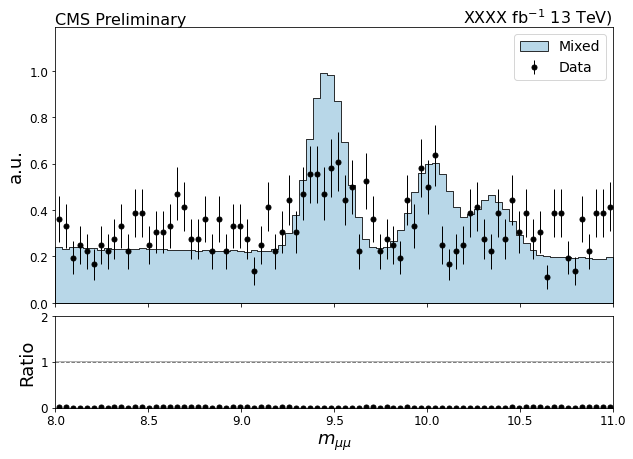

In [51]:
# make a nice ratio plot
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})
fig, (ax, rax) = plt.subplots(2, 1, figsize=(10,7), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
fig.subplots_adjust(hspace=.07)

# Here is an example of setting up a color cycler to color the various fill patches
# http://colorbrewer2.org/#type=qualitative&scheme=Paired&n=6
from cycler import cycler
colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']
ax.set_prop_cycle(cycler(color=colors))

fill_opts = {
    'edgecolor': (0,0,0,0.3),
    'alpha': 0.8
}
error_opts = {
    'label':'Stat. Unc.',
    'hatch':'///',
    'facecolor':'none',
    'edgecolor':(0,0,0,.5),
    'linewidth': 0
}
data_err_opts = {
    'linestyle':'none',
    'marker': '.',
    'markersize': 10.,
    'color':'k',
    'elinewidth': 1,
}

hist.plot1d(upsilons_histo["Mixed"],
            overlay="source",
            ax=ax,
            clear=False,
            stack=False,
            line_opts=None,
            fill_opts=fill_opts,
            error_opts=error_opts,
            density=True,
           )
hist.plot1d(upsilons_histo["Data"],
            overlay="source",
            ax=ax,
            clear=False,
            error_opts=data_err_opts,
            density=True,
           )

ax.autoscale(axis='x', tight=True)
ax.set_ylim(0, None)

ax.set_xlabel(None)
ax.set_ylabel("a.u.")
leg = ax.legend()

hist.plotratio(upsilons_histo["Data"].sum("source"), upsilons_histo["Mixed"].sum("source"),
               ax=rax,
               error_opts=data_err_opts,
               denom_fill_opts={},
               guide_opts={},
               unc='num'
              )
rax.set_ylabel('Ratio')
rax.set_ylim(0,2)



coffee = plt.text(0., 1., u"CMS Preliminary",
                  fontsize=16,
                  horizontalalignment='left',
                  verticalalignment='bottom',
                  transform=ax.transAxes
                 )
lumi = plt.text(1., 1., r"XXXX fb$^{-1}$ 13 TeV)",
                fontsize=16,
                horizontalalignment='right',
                verticalalignment='bottom',
                transform=ax.transAxes
               )

## Kinematical distributions after mixing. Sidebands only!!!!

In [52]:
pprint(data_2018.keys())

# 'photon_pt', 
# 'photon_eta', 
# 'photon_phi', 

# 'upsilon_pt', 
# 'upsilon_eta', 
# 'upsilon_phi', 
# 'upsilon_mass', 

# 'boson_pt', 
# 'boson_eta', 
# 'boson_phi', 
# 'boson_mass', 

# 'delta_R_upsilon_photon', 
# 'delta_Phi_leading_photon', 
# 'et_photon_over_M_boson', 
# 'pt_upsilon_over_M_boson', 


dict_keys(['dimuon_mass_for_upsilon_fit', 'dimuon_mass_for_upsilon_fit_weights_sign', 'leadmu_pt', 'leadmu_eta', 'leadmu_phi', 'trailmu_pt', 'trailmu_eta', 'trailmu_phi', 'photon_pt', 'photon_eta', 'photon_phi', 'photon_calibEnergy', 'photon_calibEt', 'photon_etasc', 'upsilon_pt', 'upsilon_eta', 'upsilon_phi', 'upsilon_mass', 'boson_pt', 'boson_eta', 'boson_phi', 'boson_mass', 'delta_R_leading_photon', 'delta_R_leading_photon_mask', 'delta_R_trailing_photon', 'delta_R_trailing_photon_mask', 'delta_R_upsilon_photon', 'delta_R_upsilon_photon_mask', 'delta_Phi_leading_photon', 'delta_Phi_leading_photon_mask', 'et_photon_over_M_boson', 'et_photon_over_M_boson_mask', 'pt_upsilon_over_M_boson', 'pt_upsilon_over_M_boson_mask', 'cutflow', 'run', 'event', 'lumis', 'isData', 'nVtx', 'nGoodVtx', 'isPVGood', 'vtx', 'vty', 'vtz', 'rho', 'rhoCentral', 'L1ECALPrefire', 'L1ECALPrefireUp', 'L1ECALPrefireDown', 'HLTEleMuX', 'HLTPho', 'HLTPhoRejectedByPS', 'HLTJet', 'HLTEleMuXIsPrescaled', 'HLTPhoIsPresc

In [0]:
side_bands = ((data_2018["boson_mass"].value[pass_kin_cuts] < 80.) | (data_2018["boson_mass"].value[pass_kin_cuts] > 100.)) & ((data_2018["boson_mass"].value[pass_kin_cuts] > 70) & (data_2018["boson_mass"].value[pass_kin_cuts] < 120.))
nominal_scale = side_bands.sum()

# Two types of axes exist presently: bins and categories
side_bands_histo = hist.Hist("Events",
                              hist.Cat("source", "Source:"),
                              # hist.Bin("pt", r"$p_{T}$", 30, 0, 300),
                              # hist.Bin("eta", r"$\eta$", 30, -2.4, +2.4),
                              # hist.Bin("phi", r"$\phi$", 30, -4, +4),
                              # hist.Bin("mass", r"$m_{\mu\mu\gamma}$", 50, 70, 120),
                              hist.Bin("delta_R", r"$\Delta R(\mu\mu, \gamma)$", 50, 0.0, 5.0),
                              hist.Bin("delta_Phi", r"$|\Delta\phi(\mu\mu, \gamma)|$", 50, 0.0, 4.0),
                              hist.Bin("et_photon_over_M_boson", r"$E_{T}^{\gamma}/m_{\mu\mu\gamma}$", 50, 0.0, 1.0),
                              hist.Bin("pt_upsilon_over_M_boson", r"$p_{T}^{\mu\mu}/m_{\mu\mu\gamma}$", 50, 0.0, 1.0)
                             )
side_bands_histo.fill(
                    source="Data", 
                    # pt=data_2018["upsilon_pt"].value[side_bands], 
                    # eta=data_2018["upsilon_eta"].value[side_bands],
                    # phi=data_2018["upsilon_phi"].value[side_bands],
                    # mass=data_2018["boson_mass"].value[side_bands],
                    delta_R=data_2018["delta_R_upsilon_photon"].value[pass_kin_cuts][side_bands],
                    delta_Phi=np.absolute((data_2018["upsilon_phi"].value[pass_kin_cuts] - data_2018["photon_phi"].value[pass_kin_cuts] + math.pi) % (2*math.pi) - math.pi)[side_bands],
                    et_photon_over_M_boson=data_2018["et_photon_over_M_boson"].value[pass_kin_cuts][side_bands],
                    pt_upsilon_over_M_boson=data_2018["pt_upsilon_over_M_boson"].value[pass_kin_cuts][side_bands],
                )

side_bands_mixed = ((full_mix_bosons.mass.flatten() < 80.) | (full_mix_bosons.mass.flatten() > 100.)) & ((full_mix_bosons.mass.flatten() > 70.) & (full_mix_bosons.mass.flatten() < 120.))
mixed_scale = side_bands_mixed.sum()

side_bands_histo.fill(
                    source="Mixed", 
                    # pt=data_2018["upsilon_pt"].value[side_bands], 
                    # eta=data_2018["upsilon_eta"].value[side_bands],
                    # phi=data_2018["upsilon_phi"].value[side_bands],
                    # mass=data_2018["boson_mass"].value[side_bands],
                    delta_R=full_mix_bosons.i0.p4.delta_r(full_mix_bosons.i1.p4).flatten()[side_bands_mixed],
                    delta_Phi=np.absolute(full_mix_bosons.i0.p4.delta_phi(full_mix_bosons.i1.p4)).flatten()[side_bands_mixed],
                    et_photon_over_M_boson=(full_mix_bosons.i1.pt/full_mix_bosons.mass).flatten()[side_bands_mixed],
                    pt_upsilon_over_M_boson=(full_mix_bosons.i0.pt/full_mix_bosons.mass).flatten()[side_bands_mixed],
                )

scaling_factor = float(nominal_scale)/float(mixed_scale)
side_bands_histo.scale({'Data': 1., 'Mixed': scaling_factor}, axis='source')



/usr/local/lib/python3.6/dist-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/coffea/hist/plot.py:359: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/usr/local/lib/python3.6/dist-packages/coffea/hist/plot.py:366: RuntimeWarning: invalid value encountered in true_divide
  rsumw_err = np.abs(poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:873: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asarray(arg

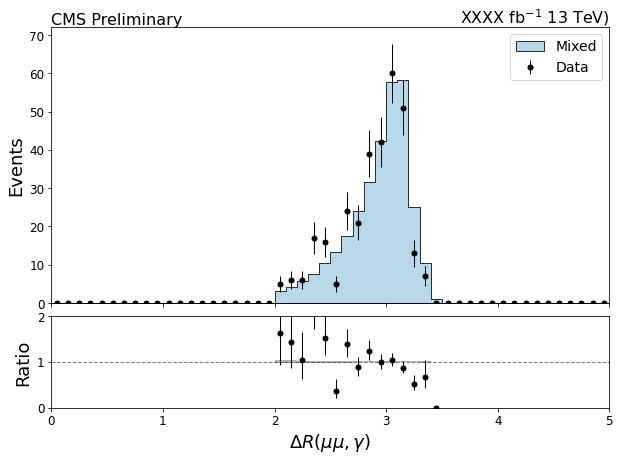

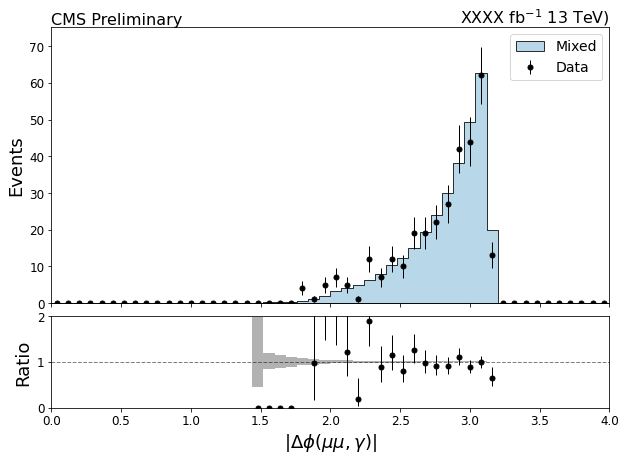

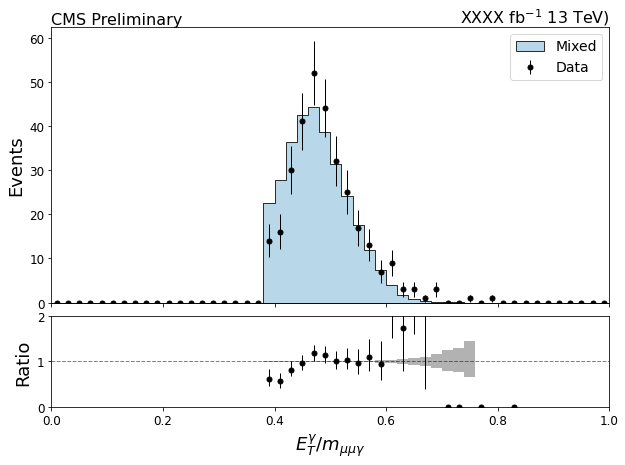

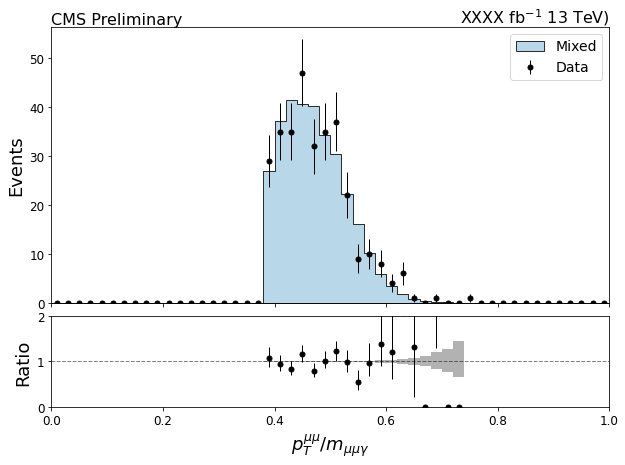

In [54]:
for var in ["delta_R", "delta_Phi", "et_photon_over_M_boson", "pt_upsilon_over_M_boson"]:
  # make a nice ratio plot
  plt.rcParams.update({
      'font.size': 14,
      'axes.titlesize': 18,
      'axes.labelsize': 18,
      'xtick.labelsize': 12,
      'ytick.labelsize': 12
  })
  fig, (ax, rax) = plt.subplots(2, 1, figsize=(10,7), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
  fig.subplots_adjust(hspace=.07)

  # Here is an example of setting up a color cycler to color the various fill patches
  # http://colorbrewer2.org/#type=qualitative&scheme=Paired&n=6
  from cycler import cycler
  colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']
  ax.set_prop_cycle(cycler(color=colors))

  fill_opts = {
      'edgecolor': (0,0,0,0.3),
      'alpha': 0.8
  }
  error_opts = {
      'label':'Stat. Unc.',
      'hatch':'///',
      'facecolor':'none',
      'edgecolor':(0,0,0,.5),
      'linewidth': 0
  }
  data_err_opts = {
      'linestyle':'none',
      'marker': '.',
      'markersize': 10.,
      'color':'k',
      'elinewidth': 1,
  }

  hist.plot1d(side_bands_histo.project(var, "source")["Mixed"],
              overlay="source",
              ax=ax,
              clear=False,
              stack=False,
              line_opts=None,
              fill_opts=fill_opts,
              error_opts=error_opts,
              # density=True,
            )
  hist.plot1d(side_bands_histo.project(var, "source")["Data"],
              overlay="source",
              ax=ax,
              clear=False,
              error_opts=data_err_opts,
              # density=True,
            )

  ax.autoscale(axis='x', tight=True)
  ax.set_ylim(0, None)

  ax.set_xlabel(None)
  # ax.set_ylabel("a.u.")
  leg = ax.legend()

  hist.plotratio(side_bands_histo.project(var, "source")["Data"].sum("source"), side_bands_histo.project(var, "source")["Mixed"].sum("source"),
                ax=rax,
                error_opts=data_err_opts,
                denom_fill_opts={},
                guide_opts={},
                unc='num'
                )
  rax.set_ylabel('Ratio')
  rax.set_ylim(0,2)



  coffee = plt.text(0., 1., u"CMS Preliminary",
                    fontsize=16,
                    horizontalalignment='left',
                    verticalalignment='bottom',
                    transform=ax.transAxes
                  )
  lumi = plt.text(1., 1., r"XXXX fb$^{-1}$ 13 TeV)",
                  fontsize=16,
                  horizontalalignment='right',
                  verticalalignment='bottom',
                  transform=ax.transAxes
                )

### Exploring correlations

In [0]:
import pandas as pd
side_bands_df = pd.DataFrame({
                          "source" : "Data",
                          "delta_R" : data_2018["delta_R_upsilon_photon"].value[pass_kin_cuts][side_bands],
                          "delta_Phi" : np.absolute((data_2018["upsilon_phi"].value[pass_kin_cuts] - data_2018["photon_phi"].value[pass_kin_cuts] + math.pi) % (2*math.pi) - math.pi)[side_bands],
                          "et_photon_over_M_boson" : data_2018["et_photon_over_M_boson"].value[pass_kin_cuts][side_bands],
                          "pt_upsilon_over_M_boson" : data_2018["pt_upsilon_over_M_boson"].value[pass_kin_cuts][side_bands],
                    })

side_bands_mixed_df = pd.DataFrame({
                          "source" : "Mix",
                          "delta_R" : full_mix_bosons.i0.p4.delta_r(full_mix_bosons.i1.p4).flatten()[side_bands_mixed],
                          "delta_Phi" : np.absolute(full_mix_bosons.i0.p4.delta_phi(full_mix_bosons.i1.p4)).flatten()[side_bands_mixed],
                          "et_photon_over_M_boson" : (full_mix_bosons.i1.pt/full_mix_bosons.mass).flatten()[side_bands_mixed],
                          "pt_upsilon_over_M_boson" : (full_mix_bosons.i0.pt/full_mix_bosons.mass).flatten()[side_bands_mixed],
                    })



/root/miniconda3/lib/ROOT.py:522: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  return _orig_ihook( name, *args, **kwds )


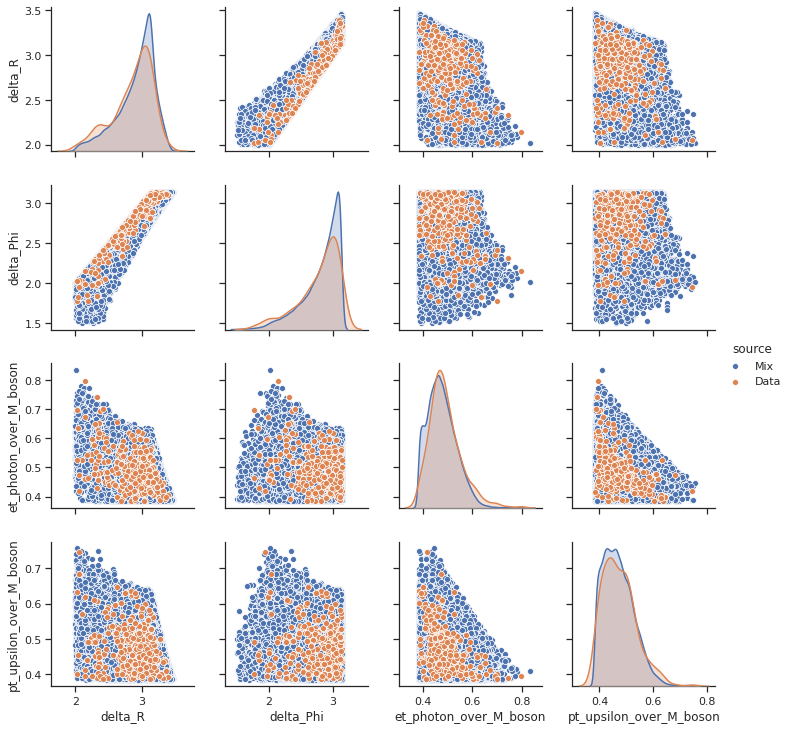

In [56]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
sns.pairplot(pd.concat([side_bands_mixed_df, side_bands_df]), hue="source", )
# sns.pairplot(side_bands_mixed_df)


In [57]:
side_bands_kinematical_df = pd.DataFrame({
                          "source" : "Data",
                          "upsilon_pt" : data_2018["upsilon_pt"].value[pass_kin_cuts][side_bands],
                          "upsilon_eta" : data_2018["upsilon_eta"].value[pass_kin_cuts][side_bands],
                          "upsilon_phi" : data_2018["upsilon_phi"].value[pass_kin_cuts][side_bands],
                          "upsilon_mass" : data_2018["upsilon_mass"].value[pass_kin_cuts][side_bands],
                          "photon_pt" : data_2018["photon_pt"].value[pass_kin_cuts][side_bands],
                          "photon_eta" : data_2018["photon_eta"].value[pass_kin_cuts][side_bands],
                          "photon_phi" : data_2018["photon_phi"].value[pass_kin_cuts][side_bands],
                          "boson_pt" : data_2018["boson_pt"].value[pass_kin_cuts][side_bands],
                          "boson_eta" : data_2018["boson_eta"].value[pass_kin_cuts][side_bands],
                          "boson_phi" : data_2018["boson_phi"].value[pass_kin_cuts][side_bands],
                          "boson_mass" : data_2018["boson_mass"].value[pass_kin_cuts][side_bands],
                    })

side_bands_kinematical_mixed_df = pd.DataFrame({
                          "source" : "Mix",
                          "upsilon_pt" : full_mix_bosons.i0.pt.flatten()[side_bands_mixed],
                          "upsilon_eta" : full_mix_bosons.i0.eta.flatten()[side_bands_mixed],
                          "upsilon_phi" : full_mix_bosons.i0.phi.flatten()[side_bands_mixed],
                          "upsilon_mass" : full_mix_bosons.i0.mass.flatten()[side_bands_mixed],
                          "photon_pt" : full_mix_bosons.i1.pt.flatten()[side_bands_mixed],
                          "photon_eta" : full_mix_bosons.i1.eta.flatten()[side_bands_mixed],
                          "photon_phi" : full_mix_bosons.i1.phi.flatten()[side_bands_mixed],
                          "boson_pt" : full_mix_bosons.pt.flatten()[side_bands_mixed],
                          "boson_eta" : full_mix_bosons.eta.flatten()[side_bands_mixed],
                          "boson_phi" : full_mix_bosons.phi.flatten()[side_bands_mixed],
                          "boson_mass" : full_mix_bosons.mass.flatten()[side_bands_mixed],
                    })

sns.pairplot(pd.concat([side_bands_kinematical_mixed_df, side_bands_kinematical_df]), hue="source")


Output hidden; open in https://colab.research.google.com to view.